In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
iris=load_iris()

In [6]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target']).astype({'target': int}).assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [8]:
x=iris.data
y=iris.target

In [9]:
x = df.drop(['species', 'target'], axis=1)
y = df['species']
print(x)
print(y)
print(x.shape)
print(y.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = model.predict(x_test) 
model.score(x_test,y_test)


1.0

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
print("Accuracy:", accuracy_score (y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) 
disp=ConfusionMatrixDisplay (confusion_matrix=cm)
print("Confusion matrix:")
print(cm)

Accuracy: 1.0
Confusion matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


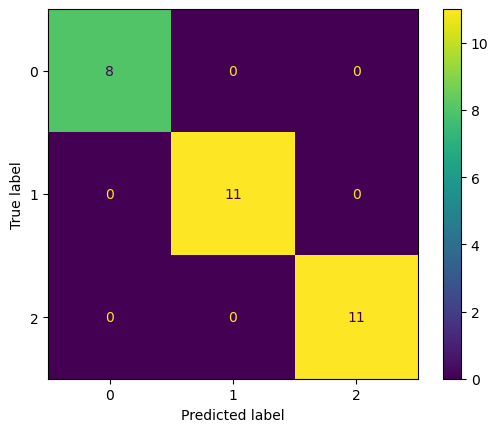

In [18]:
disp.plot()
plt.show()

In [19]:
def get_confusion_matrix_values (y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0] [1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values (y_test, y_pred)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  8
FP:  0
FN:  0
TN:  11


In [20]:
print("The Accuracy is ", (TP+TN)/(TP+TN+FP+FN))
print("The precision is ", TP/(TP+FP))
print("Error Rate:", 1-(TP+TN)/(TP+TN+FP+FN))
print("The recall is ", TP/(TP+FN))

The Accuracy is  1.0
The precision is  1.0
Error Rate: 0.0
The recall is  1.0
